# Lesson 3 
Karl Enright
Credits to: https://www.kaggle.com/peter138/project3 
https://www.kaggle.com/alijs1/ieee-transaction-columns-reference/notebook

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [38]:
train_id=pd.read_csv("train_identity.csv")
train_trans=pd.read_csv ("train_transaction.csv")
test_id=pd.read_csv("test_identity.csv")
test_trans=pd.read_csv ("test_transaction.csv")

In [41]:
print(train_id.shape, test_id.shape)
print(train_trans.shape, test_trans.shape)

(144233, 41) (141907, 41)
(590540, 394) (506691, 393)


## Reduce data size

In [31]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [42]:
train_id = reduce_mem_usage(train_id)
train_trans = reduce_mem_usage(train_trans)
test_id = reduce_mem_usage(test_id)
test_trans = reduce_mem_usage(test_trans)

Memory usage of dataframe is 45.12 MB --> 25.86 MB (Decreased by 42.7%)
Memory usage of dataframe is 1775.15 MB --> 542.35 MB (Decreased by 69.4%)
Memory usage of dataframe is 44.39 MB --> 25.44 MB (Decreased by 42.7%)
Memory usage of dataframe is 1519.24 MB --> 472.59 MB (Decreased by 68.9%)


## Merge Datasets

In [44]:
train_merged=pd.merge(train_trans,train_id, on='TransactionID', how='left')
test_merged = pd.merge(test_trans, test_id, on='TransactionID', how='left')

In [45]:
print(train_merged.shape)
print(test_merged.shape)

(590540, 434)
(506691, 433)


## EDA

In [48]:
train_merged.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [46]:
print(train_merged.describe())

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06             NaN   
std     1.704744e+05       0.183755   4.617224e+06             NaN   
min     2.987000e+06       0.000000   8.640000e+04        0.250977   
25%     3.134635e+06       0.000000   3.027058e+06       43.312500   
50%     3.282270e+06       0.000000   7.306528e+06       68.750000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31936.000000   

               card1     card2     card3     card5     addr1     addr2  ...  \
count  590540.000000  581607.0  588975.0  586281.0  524834.0  524834.0  ...   
mean     9898.734658       NaN       NaN       NaN       NaN       NaN  ...   
std      4901.170153       NaN       0.0       0.0       NaN       0.0  ...   
min      1000.000000     100.0     100.0     100.0   

,0,1
isFraud,0.96501,0.03499


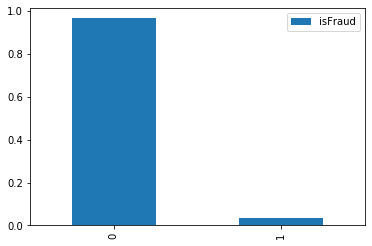

In [47]:
train_fraud = train_merged[train_merged['isFraud'] == 0]
train_not_fraud = train_merged[train_merged['isFraud'] == 1]
fc = train_merged['isFraud'].value_counts(normalize=True).to_frame()
fc.plot.bar()
fc.T

Examine kaggle competition submissions for suitable columns to drop


In [50]:
# Drop columns after EDA  credit https://www.kaggle.com/peter138/project3
drop_ls = ['id_24','id_25','id_07','id_08','id_21','id_26','id_27','id_22','dist2','D7','id_18','D14','D13','id_04','id_03','TransactionDT']
train_merged.drop(axis=1,columns=drop_ls,inplace=True)
test_merged.drop(axis=1,columns=drop_ls,inplace=True)

In [51]:
print(train_merged.shape,test_merged.shape)

(590540, 418) (506691, 417)


## Modeling
### Clean data set NaNs to -999

In [53]:
print(train_merged.shape)
print(test_merged.shape)

y_train = train_merged['isFraud'].copy()

# Drop target, fill in NaNs
X_train = train_merged.drop('isFraud', axis=1)
X_test = test_merged.copy()
X_train = X_train.fillna(-999)
X_test = X_test.fillna(-999)


(590540, 418)
(506691, 417)


### Label encoding

In [56]:
from sklearn import preprocessing

In [57]:
for f in X_train.columns:
    if X_train[f].dtype=='object' or X_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(X_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        X_test[f] = lbl.transform(list(X_test[f].values)) 

In [ ]:
### Train model
### Divide the training data into two parts for evaluation model

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1)

In [60]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(531486, 417)
(59054, 417)
(531486,)
(59054,)


In [61]:
eval_set = [(X_val, y_val)]

In [63]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [65]:
lr = LogisticRegression(max_iter=1000,solver='lbfgs')  
lr.fit(X_train, y_train)  

C:\Users\enrig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Conclusion
Logistice regression fails to converge above. Suggest using XGboost and or lgbm